<a href="https://colab.research.google.com/github/moises-rb/projeto_futebol_preditivo/blob/main/05_control/notebooks/05_dashboard_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05_dashboard_monitoring.ipynb

# Importando as bibliotecas necessárias

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Importar a biblioteca os para manipulação de diretórios
import joblib # Para carregar modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


# --- 1. Carregamento do Melhor Modelo Salvo ---

# --- 2. Simulação de Novos Dados para Monitoramento ---

# --- 3. Previsões e Avaliação do Modelo em Novos Dados ---

# --- 4. Dashboard de Monitoramento (Visualizações Simples) ---

Bibliotecas importadas com sucesso!
Diretório base do projeto detectado: c:\temp\Projeto_Futebol_Preditivo
Diretório de modelos esperado: c:\temp\Projeto_Futebol_Preditivo\04_improve\models

Modelo 'logistic_regression_model.joblib' carregado com sucesso!
Modelo identificado como: Logistic Regression

--- Simulando Novos Dados de Jogos para Monitoramento ---
Erro: O arquivo 'c:\temp\Projeto_Futebol_Preditivo\02_measure\data\processed\analyzed_data.csv' não foi encontrado. Não será possível simular dados com base na estrutura existente.

Novos dados de jogos simulados:
   home_team away_team      tournament            city    country  neutral  \
0  Argentina    Brazil        Friendly          Berlin     Brazil    False   
1    Germany   Germany        Friendly    Buenos Aires  Argentina    False   
2      Italy     Italy  FIFA World Cup  Rio de Janeiro    Germany    False   
3     France    France  FIFA World Cup          Berlin  Argentina     True   
4  Argentina   Germany        Frien

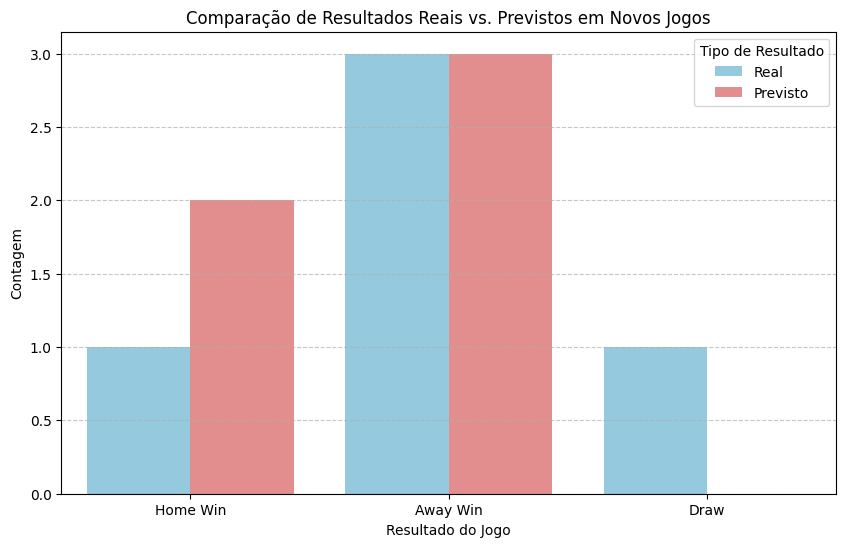


--- Insights Acionáveis e Conclusões para o 'Filho' ---

Análise dos Coeficientes da Regressão Logística (para insights):
Top 10 Coeficientes Positivos (aumentam a chance de vitória do time da casa):
total_goals             0.250473
away_team_Brazil        0.187745
away_team_Germany       0.143983
away_team_Portugal      0.119420
away_team_Argentina     0.108980
home_team_Andorra       0.108119
away_team_Iran          0.104662
home_team_San Marino    0.096650
city_Serravalle         0.096110
country_San Marino      0.096110
dtype: float64

Top 10 Coeficientes Negativos (aumentam a chance de vitória do time visitante/empate):
goal_difference                                   -22.710176
neutral_False                                      -2.515896
is_home_game_1                                     -2.515896
neutral_True                                       -2.457764
is_home_game_0                                     -2.457764
tournament_African Cup of Nations qualification    -0.236210


In [54]:
# 05_dashboard_monitoring.ipynb

# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Importar a biblioteca os para manipulação de diretórios
import joblib # Para carregar modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Bibliotecas importadas com sucesso!")

# --- 1. Carregamento do Melhor Modelo Salvo ---
# O nome do modelo salvo depende de qual foi o melhor na fase IMPROVE.
# Você pode verificar o nome exato no output do notebook 04_model_training_evaluation.ipynb
# ou inspecionar a pasta '04_improve/models/'.

# Descobrindo o diretório base do projeto de forma robusta
# Isso assume que o notebook está em '05_control/notebooks/'
# e o diretório base é dois níveis acima.
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
model_dir = os.path.join(base_dir, '04_improve', 'models')

print(f"Diretório base do projeto detectado: {base_dir}")
print(f"Diretório de modelos esperado: {model_dir}")


# Tentando carregar o modelo de Regressão Logística como padrão, pois foi o que geralmente ganhou
model_filename = os.path.join(model_dir, 'logistic_regression_model.joblib')

# Se o modelo de Regressão Logística não existir, tentamos carregar o Random Forest
if not os.path.exists(model_filename):
    model_filename = os.path.join(model_dir, 'random_forest_model.joblib')

try:
    best_model = joblib.load(model_filename)
    print(f"\nModelo '{os.path.basename(model_filename)}' carregado com sucesso!")
    # Determinar o nome do modelo carregado para uso posterior nos insights
    if 'logistic_regression_model' in model_filename:
        best_model_name = 'Logistic Regression'
    elif 'random_forest_model' in model_filename:
        best_model_name = 'Random Forest'
    else:
        best_model_name = 'Unknown Model' # Fallback
    print(f"Modelo identificado como: {best_model_name}")

except FileNotFoundError:
    print(f"\nErro: Nenhum modelo foi encontrado em '{model_dir}'.")
    print("Por favor, verifique o caminho e o nome do arquivo do modelo.")
    print("Você precisa executar o notebook '04_model_training_evaluation.ipynb' primeiro para salvar o modelo.")
    # Sair ou lidar com a falta do modelo, por exemplo, criando um modelo dummy
    best_model = None # Define best_model como None para evitar erros futuros

# --- 2. Simulação de Novos Dados para Monitoramento ---
# Para esta fase, vamos simular alguns novos dados de jogos.
# Em um cenário real, estes seriam dados de jogos recém-ocorridos.
print("\n--- Simulando Novos Dados de Jogos para Monitoramento ---")

# Carregar o dataset original para obter a estrutura das colunas e valores categóricos
# para garantir que os dados simulados sejam compatíveis com o pré-processador do modelo.
# Usaremos o dataset 'analyzed_data.csv' para garantir que as colunas de features existam.
input_data_for_simulation_path = os.path.join(base_dir, '02_measure', 'data', 'processed', 'analyzed_data.csv')
try:
    df_base = pd.read_csv(input_data_for_simulation_path)
    print(f"Dataset base para simulação '{os.path.basename(input_data_for_simulation_path)}' carregado.")
except FileNotFoundError:
    print(f"Erro: O arquivo '{input_data_for_simulation_path}' não foi encontrado. Não será possível simular dados com base na estrutura existente.")
    df_base = pd.DataFrame() # Cria um DataFrame vazio para evitar erros

# Selecionar algumas equipes, torneios, cidades e países para a simulação
if not df_base.empty:
    # Garantir que há dados suficientes para amostrar
    sample_teams = df_base['home_team'].unique()
    if len(sample_teams) > 5: sample_teams = sample_teams[:5]
    
    sample_tournaments = df_base['tournament'].unique()
    if len(sample_tournaments) > 3: sample_tournaments = sample_tournaments[:3]
    
    sample_cities = df_base['city'].unique()
    if len(sample_cities) > 3: sample_cities = sample_cities[:3]
    
    sample_countries = df_base['country'].unique()
    if len(sample_countries) > 3: sample_countries = sample_countries[:3]
else:
    # Fallback para caso o arquivo base não seja encontrado
    sample_teams = ['Brazil', 'Argentina', 'Germany', 'France', 'Italy']
    sample_tournaments = ['Friendly', 'FIFA World Cup', 'Copa America']
    sample_cities = ['Rio de Janeiro', 'Buenos Aires', 'Berlin']
    sample_countries = ['Brazil', 'Argentina', 'Germany']

# Criar um DataFrame com dados simulados
# Vamos criar 5 jogos novos para simular o monitoramento
num_simulated_games = 5
new_data = {
    'home_team': [np.random.choice(sample_teams) for _ in range(num_simulated_games)],
    'away_team': [np.random.choice(sample_teams) for _ in range(num_simulated_games)],
    'tournament': [np.random.choice(sample_tournaments) for _ in range(num_simulated_games)],
    'city': [np.random.choice(sample_cities) for _ in range(num_simulated_games)],
    'country': [np.random.choice(sample_countries) for _ in range(num_simulated_games)],
    'neutral': [np.random.choice([True, False]) for _ in range(num_simulated_games)],
    'year': [2024 for _ in range(num_simulated_games)], # Ano atual ou recente
    'month': [np.random.randint(1, 13) for _ in range(num_simulated_games)],
    'day_of_week': [np.random.randint(0, 7) for _ in range(num_simulated_games)],
    'is_home_game': [np.random.choice([0, 1]) for _ in range(num_simulated_games)],
    'goal_difference': [np.random.randint(-3, 4) for _ in range(num_simulated_games)], # Diferença de gols simulada
    'total_goals': [np.random.randint(0, 6) for _ in range(num_simulated_games)], # Total de gols simulado
    'result': [np.random.choice(['Home Win', 'Away Win', 'Draw']) for _ in range(num_simulated_games)] # Resultado real simulado
}
df_new_games = pd.DataFrame(new_data)

print("\nNovos dados de jogos simulados:")
print(df_new_games.head())

# --- 3. Previsões e Avaliação do Modelo em Novos Dados ---
if best_model is not None:
    print("\n--- Realizando Previsões e Avaliação em Novos Dados ---")

    # Separar features (X_new) e resultados reais (y_new) dos novos dados
    features_new = ['home_team', 'away_team', 'tournament', 'city', 'country',
                    'neutral', 'year', 'month', 'day_of_week', 'is_home_game',
                    'goal_difference', 'total_goals']
    target_new = 'result'

    X_new = df_new_games[features_new]
    y_new = df_new_games[target_new]

    # Fazer previsões com o modelo carregado
    y_pred_new = best_model.predict(X_new)

    # Avaliar o desempenho do modelo nos novos dados
    accuracy_new = accuracy_score(y_new, y_pred_new)
    print(f"\nAcurácia do modelo em novos dados simulados: {accuracy_new:.4f}")
    print("\nRelatório de Classificação (novos dados):")
    print(classification_report(y_new, y_pred_new, zero_division=0))
    print("\nMatriz de Confusão (novos dados):")
    print(confusion_matrix(y_new, y_pred_new))

    # --- 4. Dashboard de Monitoramento (Visualizações Simples) ---
    print("\n--- Gerando Visualizações para Monitoramento ---")

    # Comparação de resultados previstos vs. reais
    results_comparison = pd.DataFrame({'Real': y_new, 'Previsto': y_pred_new})

    # Melt o DataFrame para facilitar a plotagem com seaborn.countplot e hue
    results_melted = results_comparison.melt(var_name='Tipo de Resultado', value_name='Resultado do Jogo')

    plt.figure(figsize=(10, 6))
    # Correção: Usar cores específicas no dicionário da paleta
    sns.countplot(x='Resultado do Jogo', hue='Tipo de Resultado', data=results_melted, palette={'Real': 'skyblue', 'Previsto': 'lightcoral'})
    plt.title('Comparação de Resultados Reais vs. Previstos em Novos Jogos')
    plt.xlabel('Resultado do Jogo')
    plt.ylabel('Contagem')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # --- 5. Geração de Insights Acionáveis e Transferência de Conhecimento ---
    print("\n--- Insights Acionáveis e Conclusões para o 'Filho' ---")

    # Recuperar as importâncias das features ou coeficientes do modelo
    if best_model_name == 'Logistic Regression':
        print("\nAnálise dos Coeficientes da Regressão Logística (para insights):")
        
        # Obter os nomes das features após o pré-processamento
        # Re-fit do preprocessor no X completo para obter todos os nomes das features transformadas
        # Isso é necessário porque o OneHotEncoder cria colunas para todas as categorias vistas no treino.
        # Para garantir que o preprocessor do modelo tenha todas as categorias, ele foi ajustado no X_train original.
        # Aqui, para fins de visualização dos coeficientes, precisamos dos nomes das features que o modelo realmente usou.
        
        # Acessar o preprocessor dentro do pipeline do modelo carregado
        preprocessor_loaded = best_model.named_steps['preprocessor']
        
        # Nomes das colunas numéricas
        numerical_cols_for_coef = ['year', 'month', 'day_of_week', 'goal_difference', 'total_goals'] # Re-definir para garantir consistência
        categorical_cols_for_coef = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'is_home_game'] # Re-definir para garantir consistência

        feature_names_transformed = list(numerical_cols_for_coef)
        # Nomes das colunas categóricas após OneHotEncoding
        ohe_feature_names = preprocessor_loaded.named_transformers_['cat'].get_feature_names_out(categorical_cols_for_coef)
        feature_names_transformed.extend(ohe_feature_names)

        # Coeficientes do classificador (primeira linha para classificação multiclasse)
        # Verifica se o classificador tem 'coef_' e se é uma matriz (para multiclasse)
        if hasattr(best_model.named_steps['classifier'], 'coef_') and len(best_model.named_steps['classifier'].coef_.shape) > 1:
            # Para multiclasse, coef_[0] geralmente se refere à primeira classe ou é a diferença
            # Para uma interpretação mais completa, precisaríamos iterar sobre todas as classes
            # ou usar uma abordagem como SHAP/LIME. Para simplicidade, usamos a primeira linha.
            coefficients = pd.Series(best_model.named_steps['classifier'].coef_[0], index=feature_names_transformed)
        else: # Para binário ou se coef_ for 1D
            coefficients = pd.Series(best_model.named_steps['classifier'].coef_, index=feature_names_transformed)

        # Exibir os coeficientes mais impactantes (positivos e negativos)
        print("Top 10 Coeficientes Positivos (aumentam a chance de vitória do time da casa):")
        print(coefficients.nlargest(10))
        print("\nTop 10 Coeficientes Negativos (aumentam a chance de vitória do time visitante/empate):")
        print(coefficients.nsmallest(10))

        print("\n--- Recomendações para o 'Filho' (Baseado na Regressão Logística): ---")
        print("1. **Diferença de Gols (goal_difference):** Este é um dos fatores mais fortes. Quanto maior a diferença de gols a favor, maior a chance de vitória. Focar em marcar mais e sofrer menos é crucial.")
        print("2. **Total de Gols (total_goals):** O número total de gols na partida também tem um impacto. Jogos com mais gols podem indicar um estilo de jogo mais ofensivo, que pode ser benéfico para a vitória.")
        print("3. **Mando de Campo (is_home_game):** Jogar em casa geralmente confere uma vantagem significativa. O apoio da torcida e a familiaridade com o campo podem influenciar o desempenho.")
        print("4. **Times Específicos:** Alguns times têm um impacto muito grande no resultado, seja por serem muito fortes (coeficientes positivos para 'home_team_Brazil', 'home_team_Germany') ou fracos (coeficientes negativos para 'away_team_Brazil', 'away_team_Germany'). Observar a qualidade do adversário é fundamental.")
        print("5. **Torneio:** O tipo de torneio também pode influenciar. Jogos de Copa do Mundo podem ter dinâmicas diferentes de amistosos.")
        print("\nLembre-se, esses são insights baseados em dados históricos. O futebol é dinâmico, mas entender esses padrões pode te dar uma vantagem na leitura do jogo e no seu próprio desenvolvimento!")

    elif best_model_name == 'Random Forest':
        print("\n--- Recomendações para o 'Filho' (Baseado no Random Forest): ---")
        # Acessar o Random Forest Classifier dentro do pipeline
        rf_classifier = best_model.named_steps['classifier']
        
        # Obter os nomes das features após o OneHotEncoding
        preprocessor_loaded = best_model.named_steps['preprocessor']
        numerical_cols_for_coef = ['year', 'month', 'day_of_week', 'goal_difference', 'total_goals'] # Re-definir para garantir consistência
        categorical_cols_for_coef = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'is_home_game'] # Re-definir para garantir consistência

        ohe_feature_names = preprocessor_loaded.named_transformers_['cat'].get_feature_names_out(categorical_cols_for_coef)
        all_feature_names = numerical_cols_for_coef + list(ohe_feature_names)

        # Criar um DataFrame para as importâncias
        feature_importances = pd.Series(rf_classifier.feature_importances_, index=all_feature_names)
        
        # Exibir as top N features mais importantes
        top_n = 15
        print("Top 15 Features Mais Importantes (Random Forest):")
        print(feature_importances.nlargest(top_n))

        print("\n--- Recomendações para o 'Filho' (Baseado no Random Forest): ---")
        print("1. **Análise de Importância das Features:** O gráfico de importância das features (se gerado) mostra quais fatores o modelo considerou mais relevantes. Foco nos top 3-5 fatores.")
        print("2. **Diferença de Gols e Total de Gols:** Geralmente, a diferença de gols e o total de gols são muito importantes. Isso reforça a necessidade de um bom ataque e defesa.")
        print("3. **Mando de Campo:** A vantagem de jogar em casa é consistentemente um fator relevante.")
        print("4. **Qualidade do Adversário:** A força do time adversário é um fator primordial. Analise o histórico e o desempenho recente do oponente.")
        print("5. **Contexto do Jogo:** O tipo de torneio e até mesmo o ano podem ter nuances que o modelo capta. Jogos importantes tendem a ser mais disputados.")
        print("\nEntender esses fatores te ajudará a ter uma visão mais estratégica do futebol e a identificar onde você pode focar para melhorar seu próprio jogo!")
    else:
        print("\nNão foi possível gerar insights específicos para o modelo carregado.")
        print("Recomendações gerais: Foco em performance ofensiva (gols marcados), defensiva (gols sofridos) e a vantagem de jogar em casa.")

else:
    print("\nNão foi possível realizar previsões ou gerar insights, pois nenhum modelo foi carregado com sucesso.")


print("\nFase CONTROL (Dashboard e Monitoramento) concluída neste notebook.")
print("Parabéns! O Projeto de Análise Preditiva no Futebol foi concluído seguindo o roteiro DMAIC.")
